The decay exponent associated to the soft regime is computed for a range of conductivtiy ratios and shape parameters. Convergence toward the predicted asymptotic behaviour is validated.

The analysis is carried out on the data generated with exp1.py.

In [ ]:
# Standard imports
import pathlib

# Third party imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

# Internal imports

In [2]:
# set plot style
plt.style.use('plot_style.txt')

# output path for figures 
output_path = pathlib.Path("/home/jonas/shared/Work/SSeep2026/Figures")

# set parametrization
aq_para = 'vGM'

In [3]:
# load data
name = f'exp1_{aq_para}/slopes.csv'
df = pd.read_csv(name, index_col=0)

### Slope convergence

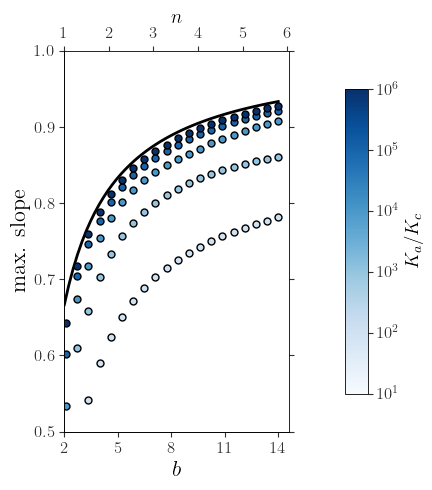

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))

# prediction
b = np.linspace(2, 14)
xi = b / (1 + b)
ax.plot(b, xi, c='k', lw=2, alpha=1)

# slope convergence
cond_ratio = df['cond_ratio'].unique()
cmap = cm.Blues
norm = colors.LogNorm(vmin=cond_ratio[0], vmax=cond_ratio[-1])

for i, v in enumerate(cond_ratio):
    idx = df['cond_ratio'] == v
    ax.plot(df.loc[idx, 'b'], df.loc[idx, 'max_slope'],
            ls='None', marker='o', ms=5, c=cmap(norm(v)), alpha=1)
    
# ax layout
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.tick_params(top=True, right=True)
ax.set(xscale='linear', yscale='linear')
ax.set_ylim(ymin=0.5, ymax=1)
ax.set_xlabel('$b$', fontsize=16)
ax.set_xticks([2, 5, 8, 11, 14])
ax.set_xlim(xmin=2)
ax.set_ylabel('max. slope', fontsize=16)

# set secondary x axes
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
xticklabels = [1, 2, 3, 4, 5, 6]
xticks = [(5 * n - 1) / 2 for n in xticklabels]
ax2.set_xticks(xticks, labels=xticklabels)
ax2.set_xlabel('$n$', labelpad=2)

# colorbar
cax = ax.inset_axes([1.25, 0.1, 0.1, 0.8])
cb = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax,
             orientation='vertical', label='$K_a / K_c$', ticks=cond_ratio)
cb.ax.minorticks_off()

plt.tight_layout()
#plt.savefig(output_path / f'slope_convergence_{aq_para}.pdf')

### Interval extent